In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
from faker import Faker
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Debtor

## Import Dataset

In [6]:
df = pd.read_csv('dummy_data_debitur (6).csv')

## Exploratory Data Analysis

### Data Visualization

#### Categorical

In [9]:
categorical_cols = ['debtor_age_class', 'debtor_gender', 'debtor_province',
                    'debtor_island', 'debtor_marital_status', 'debtor_education_level',
                    'debtor_occupation', 'ses_class', 'debtor_asset_ownership',
                    'debtor_communication_channel', 'risk_credit', 'payment_pattern',
                    'demographics_class', 'payment_method', 'behavior_class',
                    'loan_type', 'range_working_time', 'debtor_personality',
                    'debtor_aging', 'billing_type', 'field_class']

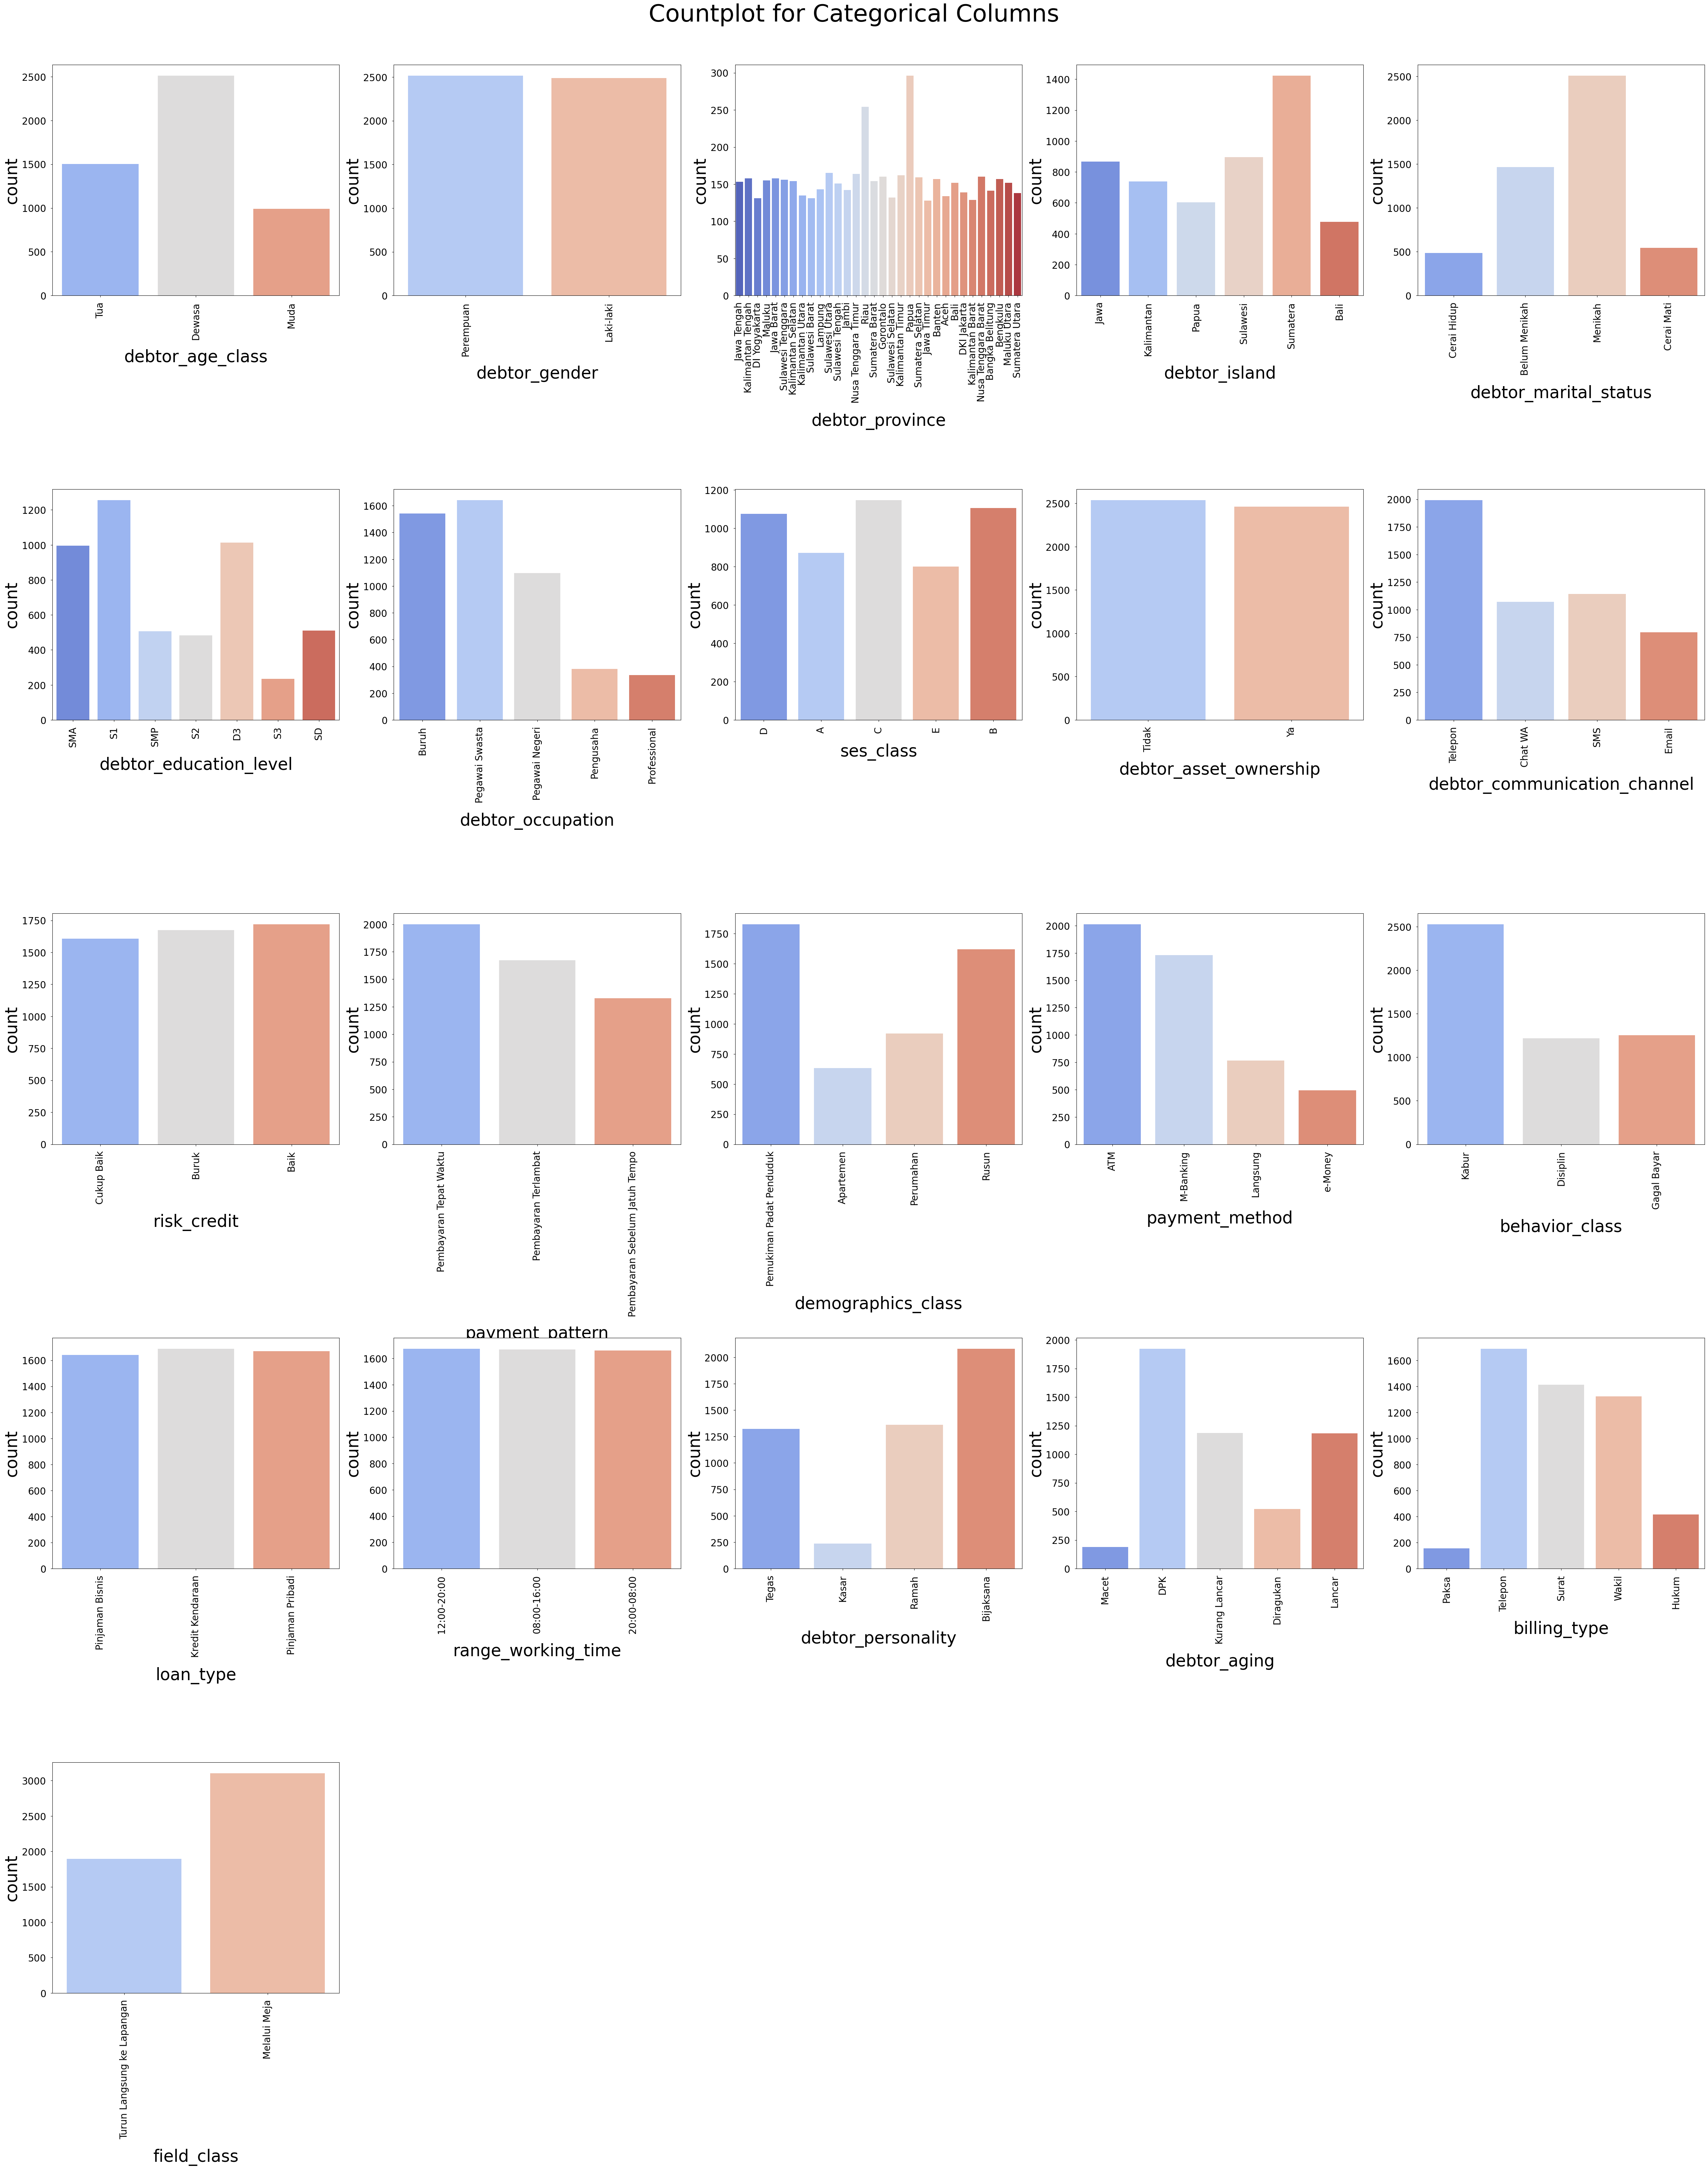

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 60))

for i in range(0, len(categorical_cols)):
    plt.subplot(5, 5, i + 1)
    ax = sns.countplot(x=df[categorical_cols[i]], palette='coolwarm', orient='h')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('count', fontsize=35)
    ax.set_xlabel(categorical_cols[i], fontsize=35)
    ax.xaxis.labelpad = 20

# Menambahkan judul keseluruhan
plt.suptitle('Countplot for Categorical Columns', fontsize=50)
plt.subplots_adjust(top=0.95)
plt.show()


Text(0, 0.5, 'Payment Patterns (Counts)')

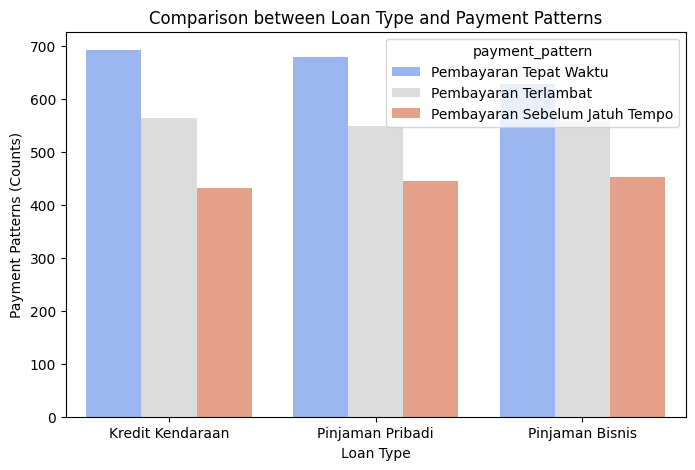

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='loan_type',
    data=df,
    palette='coolwarm',
    hue='payment_pattern',
    order=df['loan_type'].value_counts().index,
    hue_order=df['payment_pattern'].value_counts().index)
plt.title('Comparison between Loan Type and Payment Patterns', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Loan Type', fontsize=10)
plt.ylabel('Payment Patterns (Counts)', fontsize=10)

Text(0, 0.5, 'Education Level')

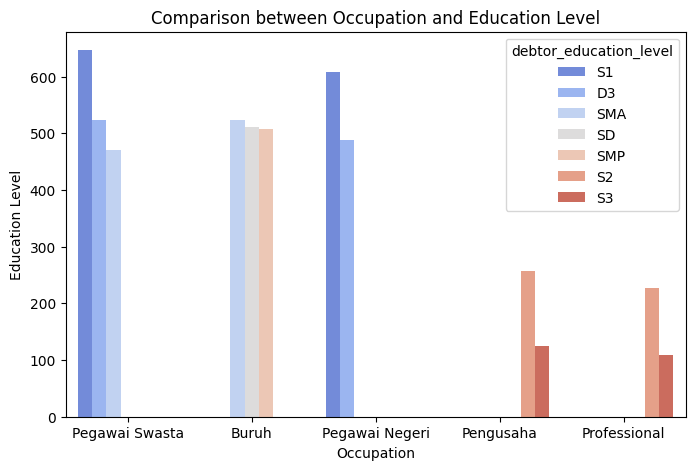

In [12]:
df.sort_values('debtor_education_level')
plt.figure(figsize=(8, 5))
sns.countplot(
    x='debtor_occupation',
    data=df,
    palette='coolwarm',
    hue='debtor_education_level',
    order=df['debtor_occupation'].value_counts().index,
    hue_order=df['debtor_education_level'].value_counts().index)
plt.title('Comparison between Occupation and Education Level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Education Level', fontsize=10)

#### Numerical

In [13]:
numerical_cols = ['debtor_age', 'debtor_number_of_dependents', 'debtor_monthly_income',
                  'debtor_monthly_expense', 'tenor',
                  'interest_rate', 'monthly_payment', 'loan_amount', 'history_jan',
                  'history_feb', 'history_mar', 'history_apr', 'history_may',
                  'history_jun', 'history_jul', 'history_aug', 'history_sep',
                  'history_oct','history_nov', 'history_dec', 'transaction',
                  'remaining_loan']

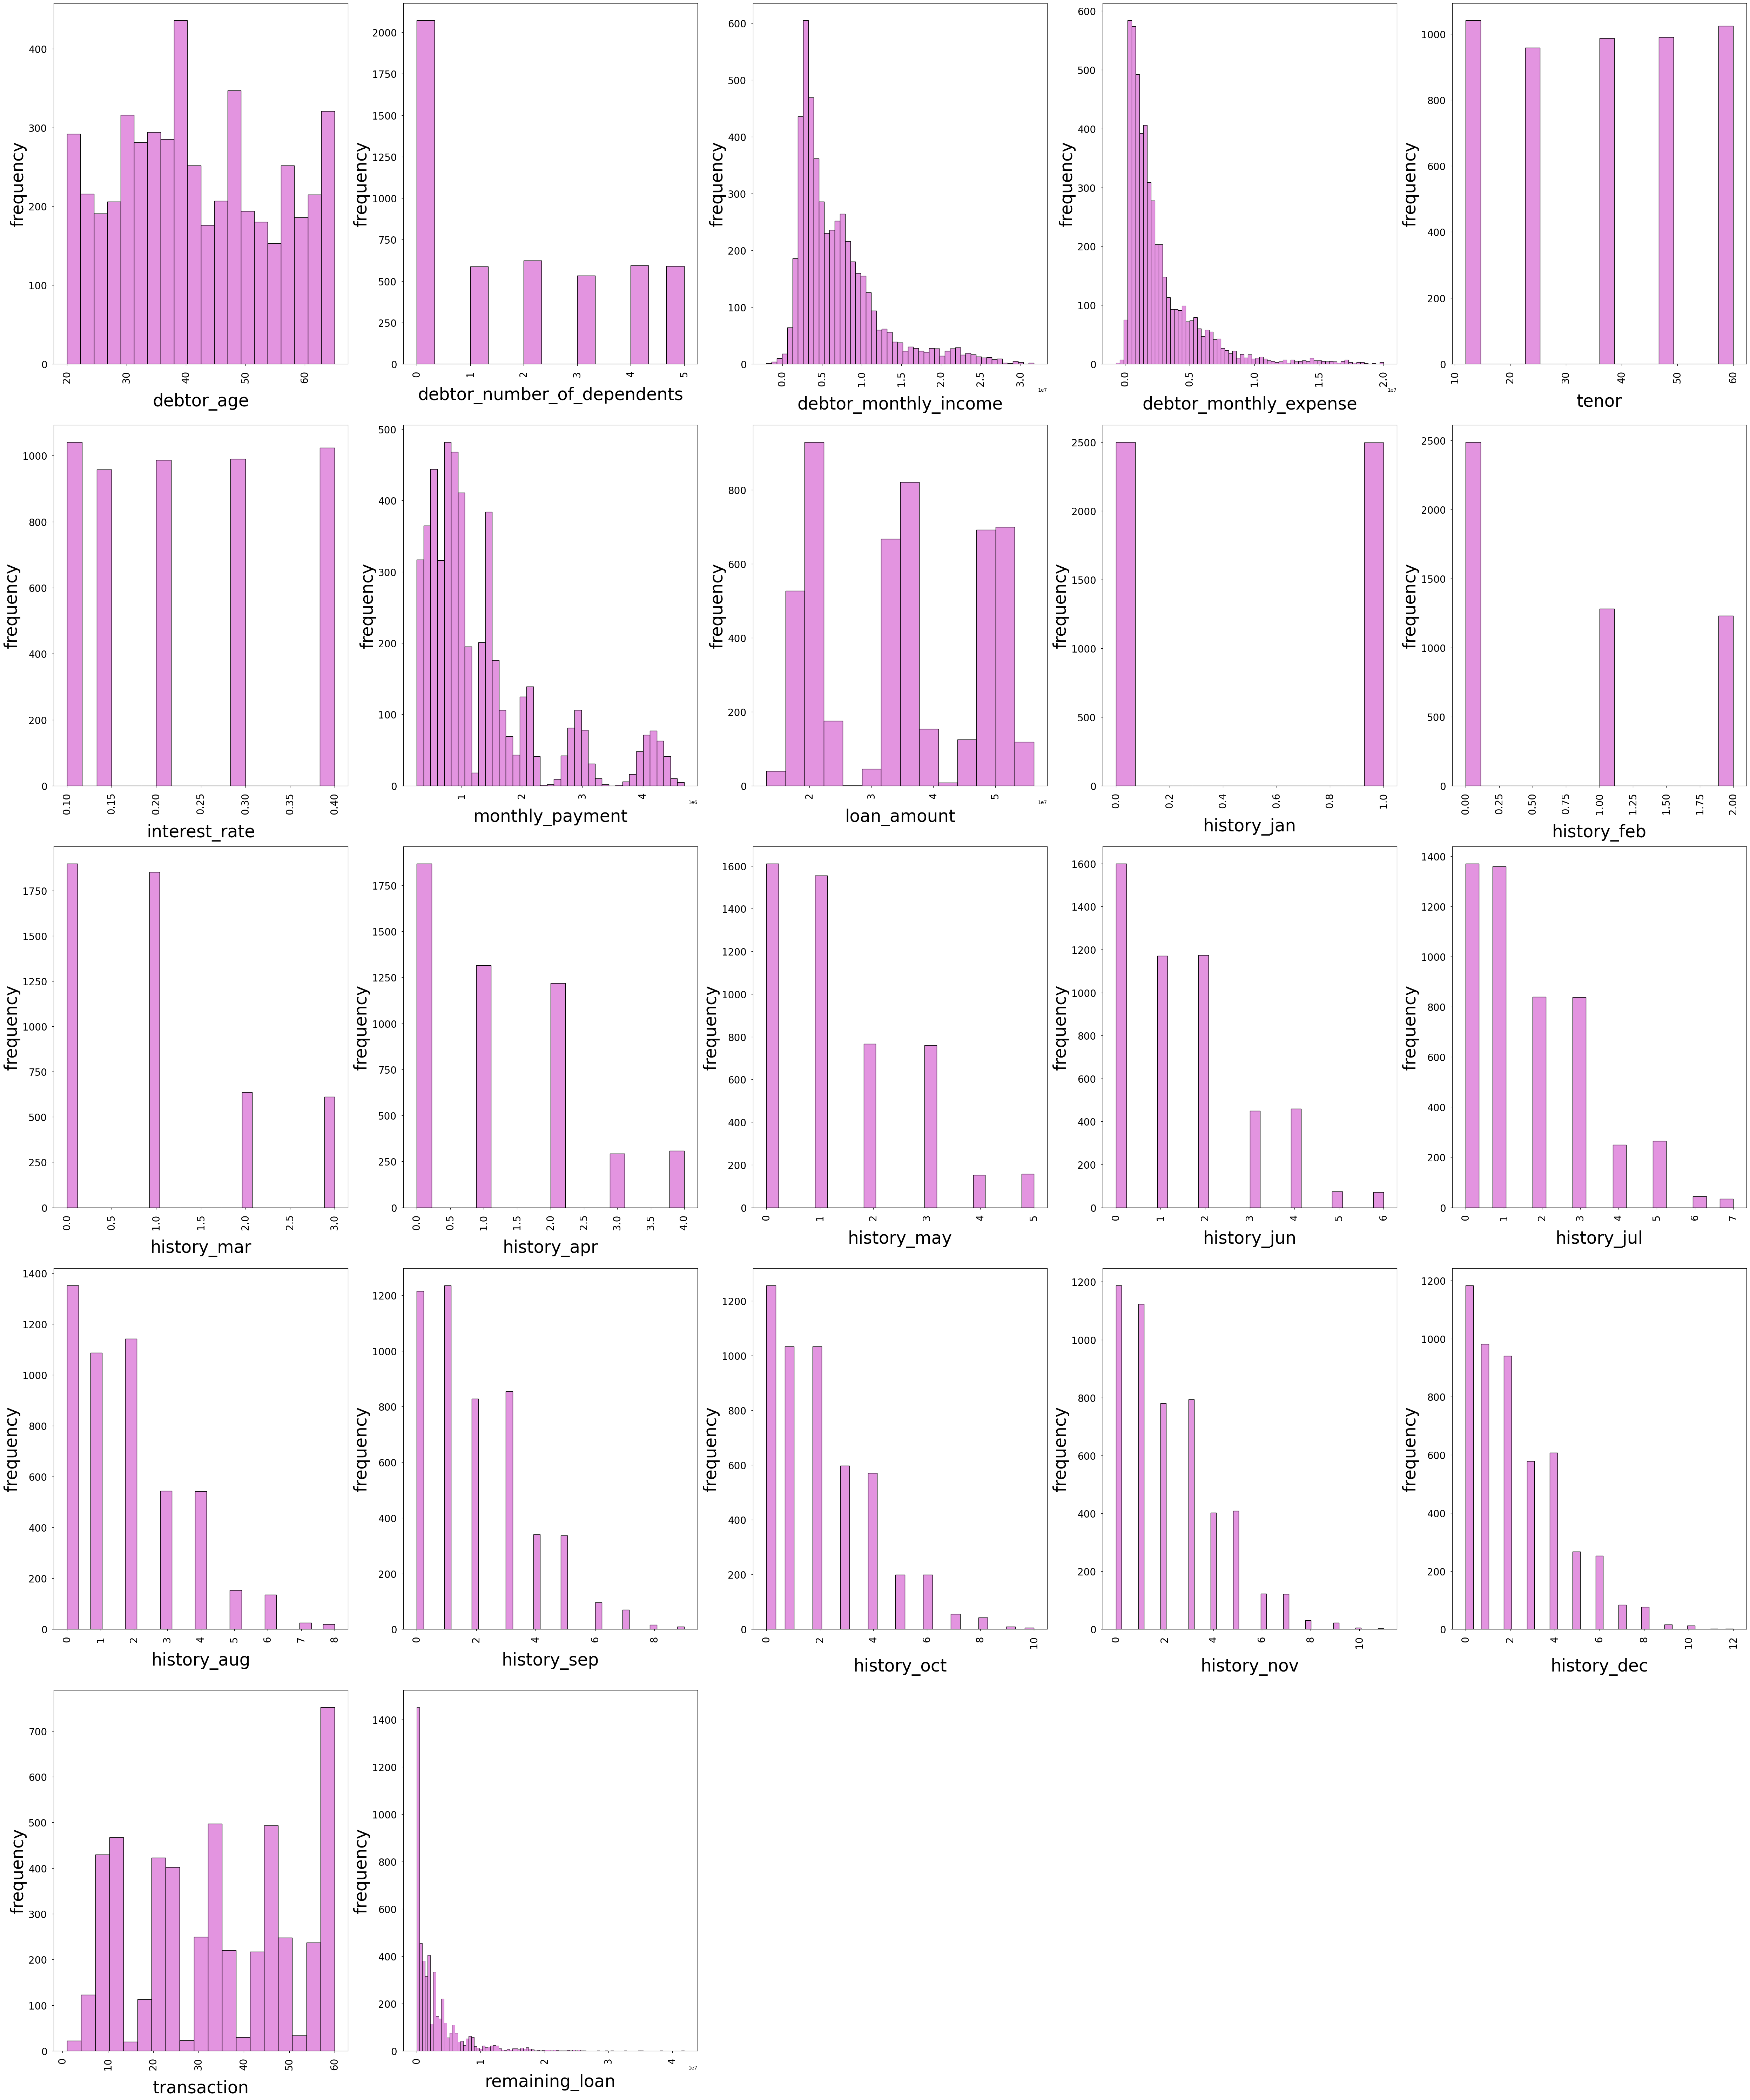

In [14]:
# Membuat subplot dengan 4 baris dan 3 kolom
plt.figure(figsize=(50, 60))

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i in range(0, len(numerical_cols)):
    plt.subplot(5, 5, i + 1)
    ax = sns.histplot(x=df[numerical_cols[i]], color='orchid')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('frequency', fontsize=35)  # Mengatur label sumbu y
    ax.set_xlabel(numerical_cols[i], fontsize=35)  # Mengatur label sumbu x
    ax.xaxis.labelpad = 20

# Menyusun subplot dan menampilkan plot
plt.tight_layout()
plt.show()

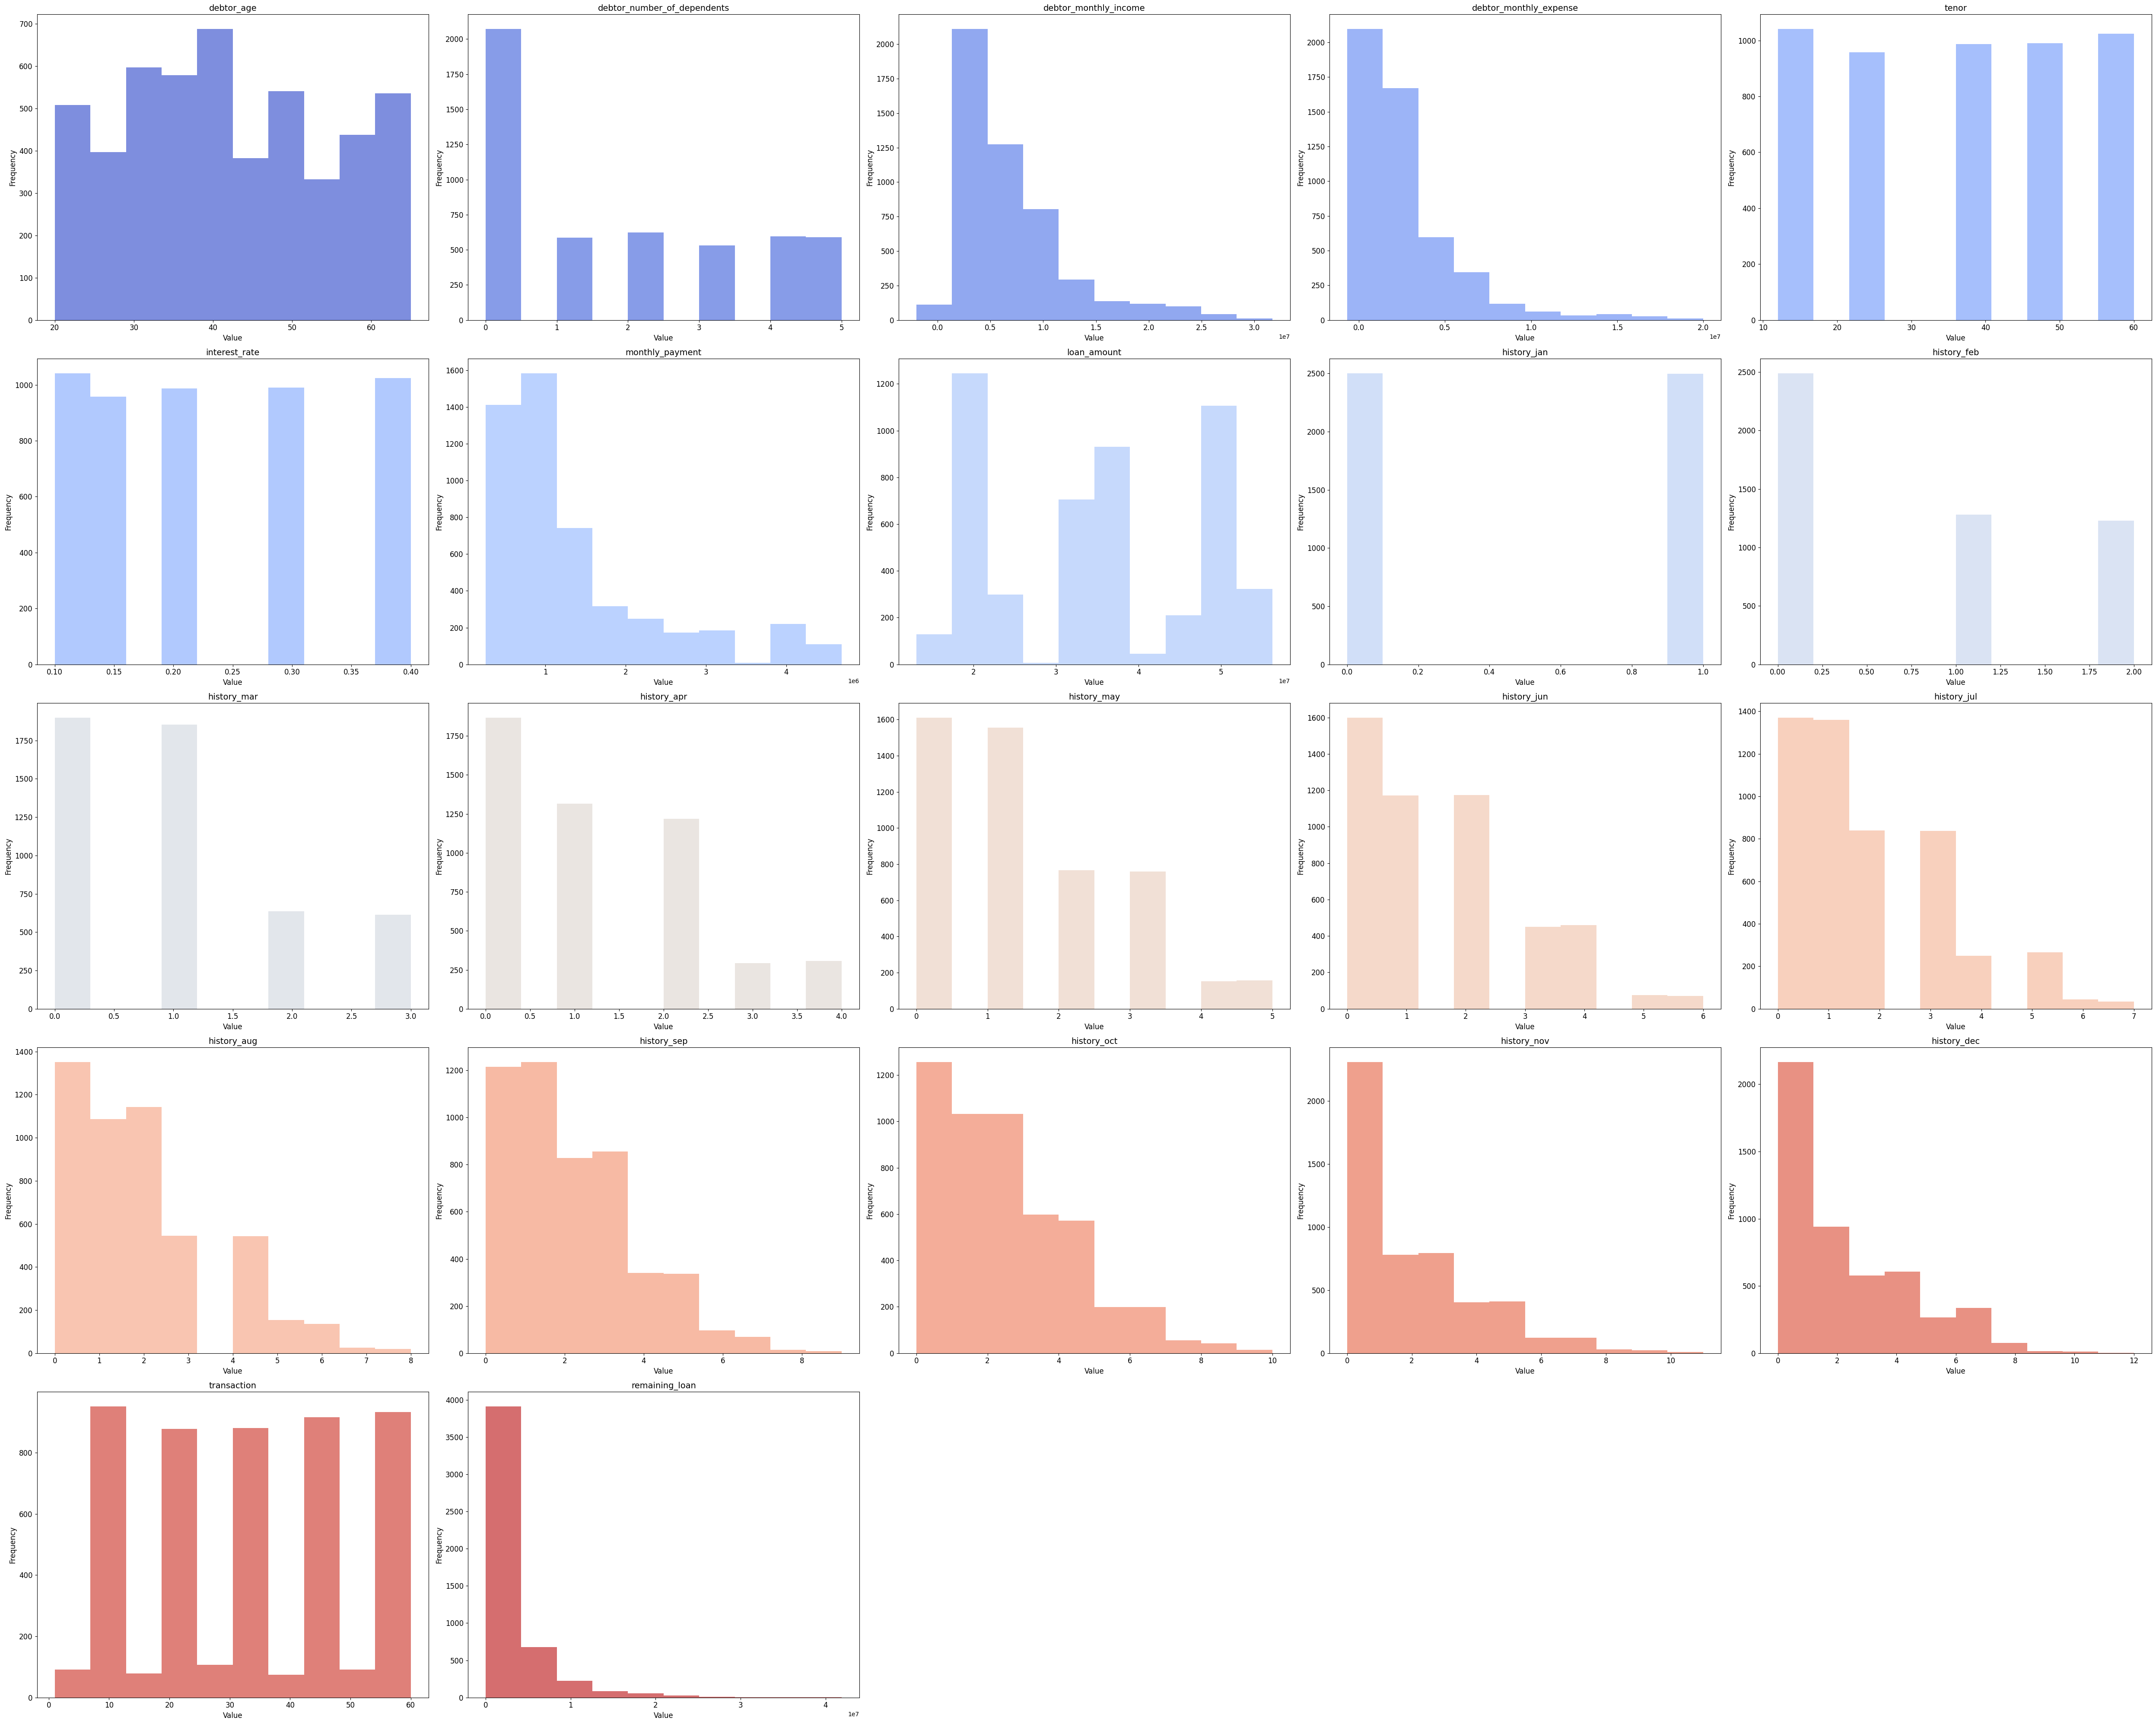

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 40))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Define a color palette with as many colors as numerical columns
colors = sns.color_palette('coolwarm', len(numerical_cols))

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=10, color=colors[i], alpha=0.7)
    axes[i].set_title(col, fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].set_xlabel('Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

###One Hot Encoding

In [21]:
# Ambil hanya kolom-kolom kategori dari DataFrame Anda
categorical_cols = df[['debtor_age_class', 'debtor_gender', 'debtor_province',
                  'debtor_island', 'debtor_marital_status', 'debtor_education_level',
                  'debtor_occupation', 'ses_class', 'debtor_asset_ownership',
                  'debtor_communication_channel', 'risk_credit', 'payment_pattern',
                  'demographics_class', 'payment_method', 'behavior_class',
                  'loan_type', 'range_working_time', 'debtor_personality',
                  'debtor_aging', 'billing_type', 'field_class']]

# Melakukan one-hot encoding untuk semua kolom kategori
one_hot_encoded = pd.get_dummies(categorical_cols)

# Gabungkan hasil one-hot encoding dengan DataFrame asli
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Hapus kolom-kolom asli yang telah diubah menjadi one-hot encoding
df_encoded = df_encoded.drop(columns=categorical_cols.columns)

### Data Scalling

In [18]:
# Lakukan scaling pada kolom-kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)
scaled_numerical_df.head()

,debtor_age,debtor_nik,debtor_number_of_dependents,debtor_monthly_income,debtor_monthly_expense,tenor,interest_rate,monthly_payment,loan_amount,history_jan,...,history_jun,history_jul,history_aug,history_sep,history_oct,history_nov,history_dec,transaction,remaining_loan,score
0,0.666667,0.580923,0.8,0.125392,0.047463,0.75,0.666667,0.164264,0.784165,1.0,...,0.333333,0.428571,0.500,0.555556,0.6,0.636364,0.666667,0.661017,0.180980,12.581361
1,0.244444,0.594100,0.0,0.461317,0.465635,0.50,0.333333,0.168259,0.529724,1.0,...,0.666667,0.428571,0.500,0.555556,0.4,0.272727,0.166667,0.559322,0.045162,9.324818
2,0.866667,0.943382,0.2,0.138621,0.075883,0.75,0.666667,0.053337,0.240764,1.0,...,0.333333,0.428571,0.250,0.111111,0.0,0.000000,0.083333,0.779661,0.008302,8.962966
3,0.822222,0.119443,0.8,0.149473,0.052644,0.00,0.000000,0.860107,0.827718,0.0,...,0.500000,0.285714,0.125,0.000000,0.0,0.000000,0.083333,0.169492,0.096518,6.041665
4,0.111111,0.752406,0.8,0.124202,0.047208,1.00,1.000000,0.073202,0.494971,0.0,...,0.333333,0.428571,0.250,0.333333,0.4,0.272727,0.166667,0.966102,0.019297,7.773130


In [26]:
# Gabungkan kedua DataFrame (numerik dan kategori)
scaled_combined_df = pd.concat([scaled_numerical_df, df_encoded], axis=1)
scaled_combined_df

,debtor_age,debtor_nik,debtor_number_of_dependents,debtor_monthly_income,debtor_monthly_expense,tenor,interest_rate,monthly_payment,loan_amount,history_jan,...,debtor_aging_Kurang Lancar,debtor_aging_Lancar,debtor_aging_Macet,billing_type_Hukum,billing_type_Paksa,billing_type_Surat,billing_type_Telepon,billing_type_Wakil,field_class_Melalui Meja,field_class_Turun Langsung ke Lapangan
0,0.666667,0.580923,0.8,0.125392,0.047463,0.75,0.666667,0.164264,0.784165,1.0,...,0,0,1,0,1,0,0,0,0,1
1,0.244444,0.594100,0.0,0.461317,0.465635,0.50,0.333333,0.168259,0.529724,1.0,...,0,0,0,0,0,0,1,0,1,0
2,0.866667,0.943382,0.2,0.138621,0.075883,0.75,0.666667,0.053337,0.240764,1.0,...,0,0,0,0,0,1,0,0,1,0
3,0.822222,0.119443,0.8,0.149473,0.052644,0.00,0.000000,0.860107,0.827718,0.0,...,0,0,0,0,0,1,0,0,1,0
4,0.111111,0.752406,0.8,0.124202,0.047208,1.00,1.000000,0.073202,0.494971,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.088889,0.372693,0.0,0.129481,0.108674,0.00,0.000000,0.294240,0.130834,0.0,...,0,1,0,0,0,0,1,0,1,0
4996,0.155556,0.132474,0.0,0.209420,0.194666,0.00,0.000000,0.283223,0.117266,1.0,...,0,0,0,0,0,1,0,0,1,0
4997,0.244444,0.784169,0.0,0.343237,0.338614,0.00,0.000000,0.566368,0.465968,0.0,...,1,0,0,0,0,0,0,1,0,1
4998,0.444444,0.547132,0.0,0.358134,0.354639,0.00,0.000000,0.623388,0.536190,0.0,...,0,0,0,0,0,1,0,0,1,0


### Correlation_Matrix

<ipython-input-27-3d85255f42cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


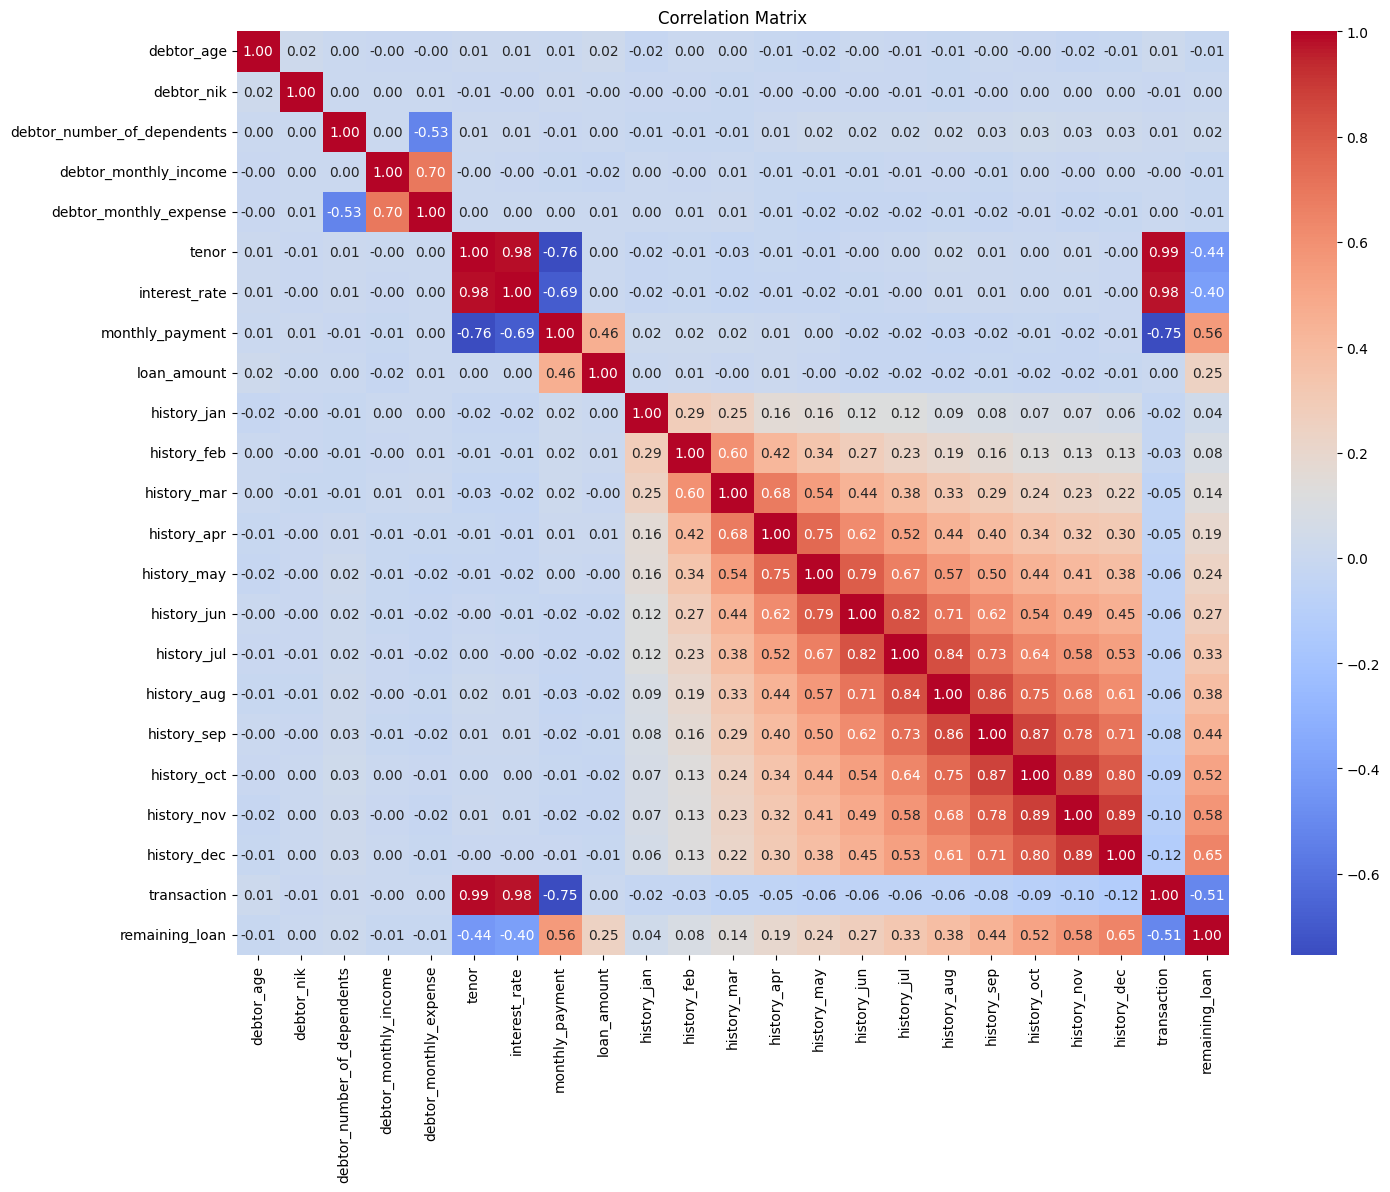

In [27]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data Description

In [29]:
df.describe()

,debtor_age,debtor_nik,debtor_number_of_dependents,debtor_monthly_income,debtor_monthly_expense,tenor,interest_rate,monthly_payment,loan_amount,history_jan,...,history_may,history_jun,history_jul,history_aug,history_sep,history_oct,history_nov,history_dec,transaction,remaining_loan
count,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,41.806000,4.924204e+15,1.752200,6.954457e+06,2.677715e+06,35.995200,0.230360,1.342366e+06,3.492987e+07,0.49980,...,1.352000,1.502000,1.675800,1.816800,1.953600,2.045000,2.166400,2.272800,33.722400,2.920246e+06
std,12.812306,2.768198e+15,1.832667,5.206655e+06,2.884802e+06,17.147862,0.108691,1.022620e+06,1.238239e+07,0.50005,...,1.317438,1.444304,1.555242,1.667871,1.766486,1.877147,1.977952,2.070178,17.274519,4.173894e+06
min,20.000000,1.118031e+14,0.000000,-2.000647e+06,-6.876100e+05,12.000000,0.100000,2.550722e+05,1.305469e+07,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,32.000000,2.557974e+15,0.000000,3.207636e+06,8.141830e+05,24.000000,0.150000,6.195570e+05,2.122534e+07,0.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,20.000000,2.179685e+05
50%,40.000000,4.972867e+15,1.000000,5.434348e+06,1.682659e+06,36.000000,0.200000,9.708371e+05,3.503790e+07,0.00000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,34.000000,1.572719e+06
75%,52.000000,7.303270e+15,3.000000,8.929139e+06,3.402500e+06,48.000000,0.300000,1.593963e+06,4.851834e+07,1.00000,...,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,48.000000,3.876619e+06
max,65.000000,9.699290e+15,5.000000,3.169449e+07,1.998595e+07,60.000000,0.400000,4.688025e+06,5.622584e+07,1.00000,...,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,60.000000,4.187258e+07


In [30]:
df.describe(include='object')

,debtor_age_class,debtor_gender,debtor_address,debtor_province,debtor_island,debtor_marital_status,debtor_education_level,debtor_occupation,debtor_asset_ownership,ses_class,...,payment_pattern,payment_method,behavior_class,loan_type,working_time,range_working_time,debtor_personality,debtor_aging,billing_type,field_class
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,3,2,5000,32,6,4,7,5,2,5,...,3,4,3,3,3,3,4,5,5,2
top,Dewasa,Perempuan,"Jalan Tubagus Ismail, RT 14/RW 4, Jawa Tengah,...",Papua,Sumatera,Menikah,S1,Pegawai Swasta,Tidak,C,...,Pembayaran Tepat Waktu,ATM,Kabur,Kredit Kendaraan,Siang-Malam,12:00-20:00,Bijaksana,DPK,Telepon,Melalui Meja
freq,2510,2514,1,296,1422,2507,1256,1642,2538,1147,...,1998,2011,2527,1688,1673,1673,2080,1922,1690,3105


## Modelling

### Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Baca dataset
data = scaled_combined_df

# Choose the number of clusters
k = 5

# Initialize the k-means model
model = KMeans(n_clusters=k)

# Fit the model to the data
model.fit(data)

# Predict the cluster for each data point
labels = model.predict(data)

# Print the cluster labels
print(labels)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='rainbow')
plt.title("Hasil Clustering (dengan PCA)")
plt.show()

# **Collector**

## Exploratory Data Analysis

### Data Visualization

####Categorical

In [ ]:
categorical_cols = ['collector_gender', 'collector_occupation', 'collector_marital_status',
                  'collector_education_level', 'collector_vehicle',
                  'negotiation_skills', 'proficient_technology_use', 'flexible_work',
                  'communication_channel', 'collector_personality', 'working_time', 'experience_level',
                  'working_time_range', 'debtor_feedback', 'handled_case_category', 'negotiation_result']

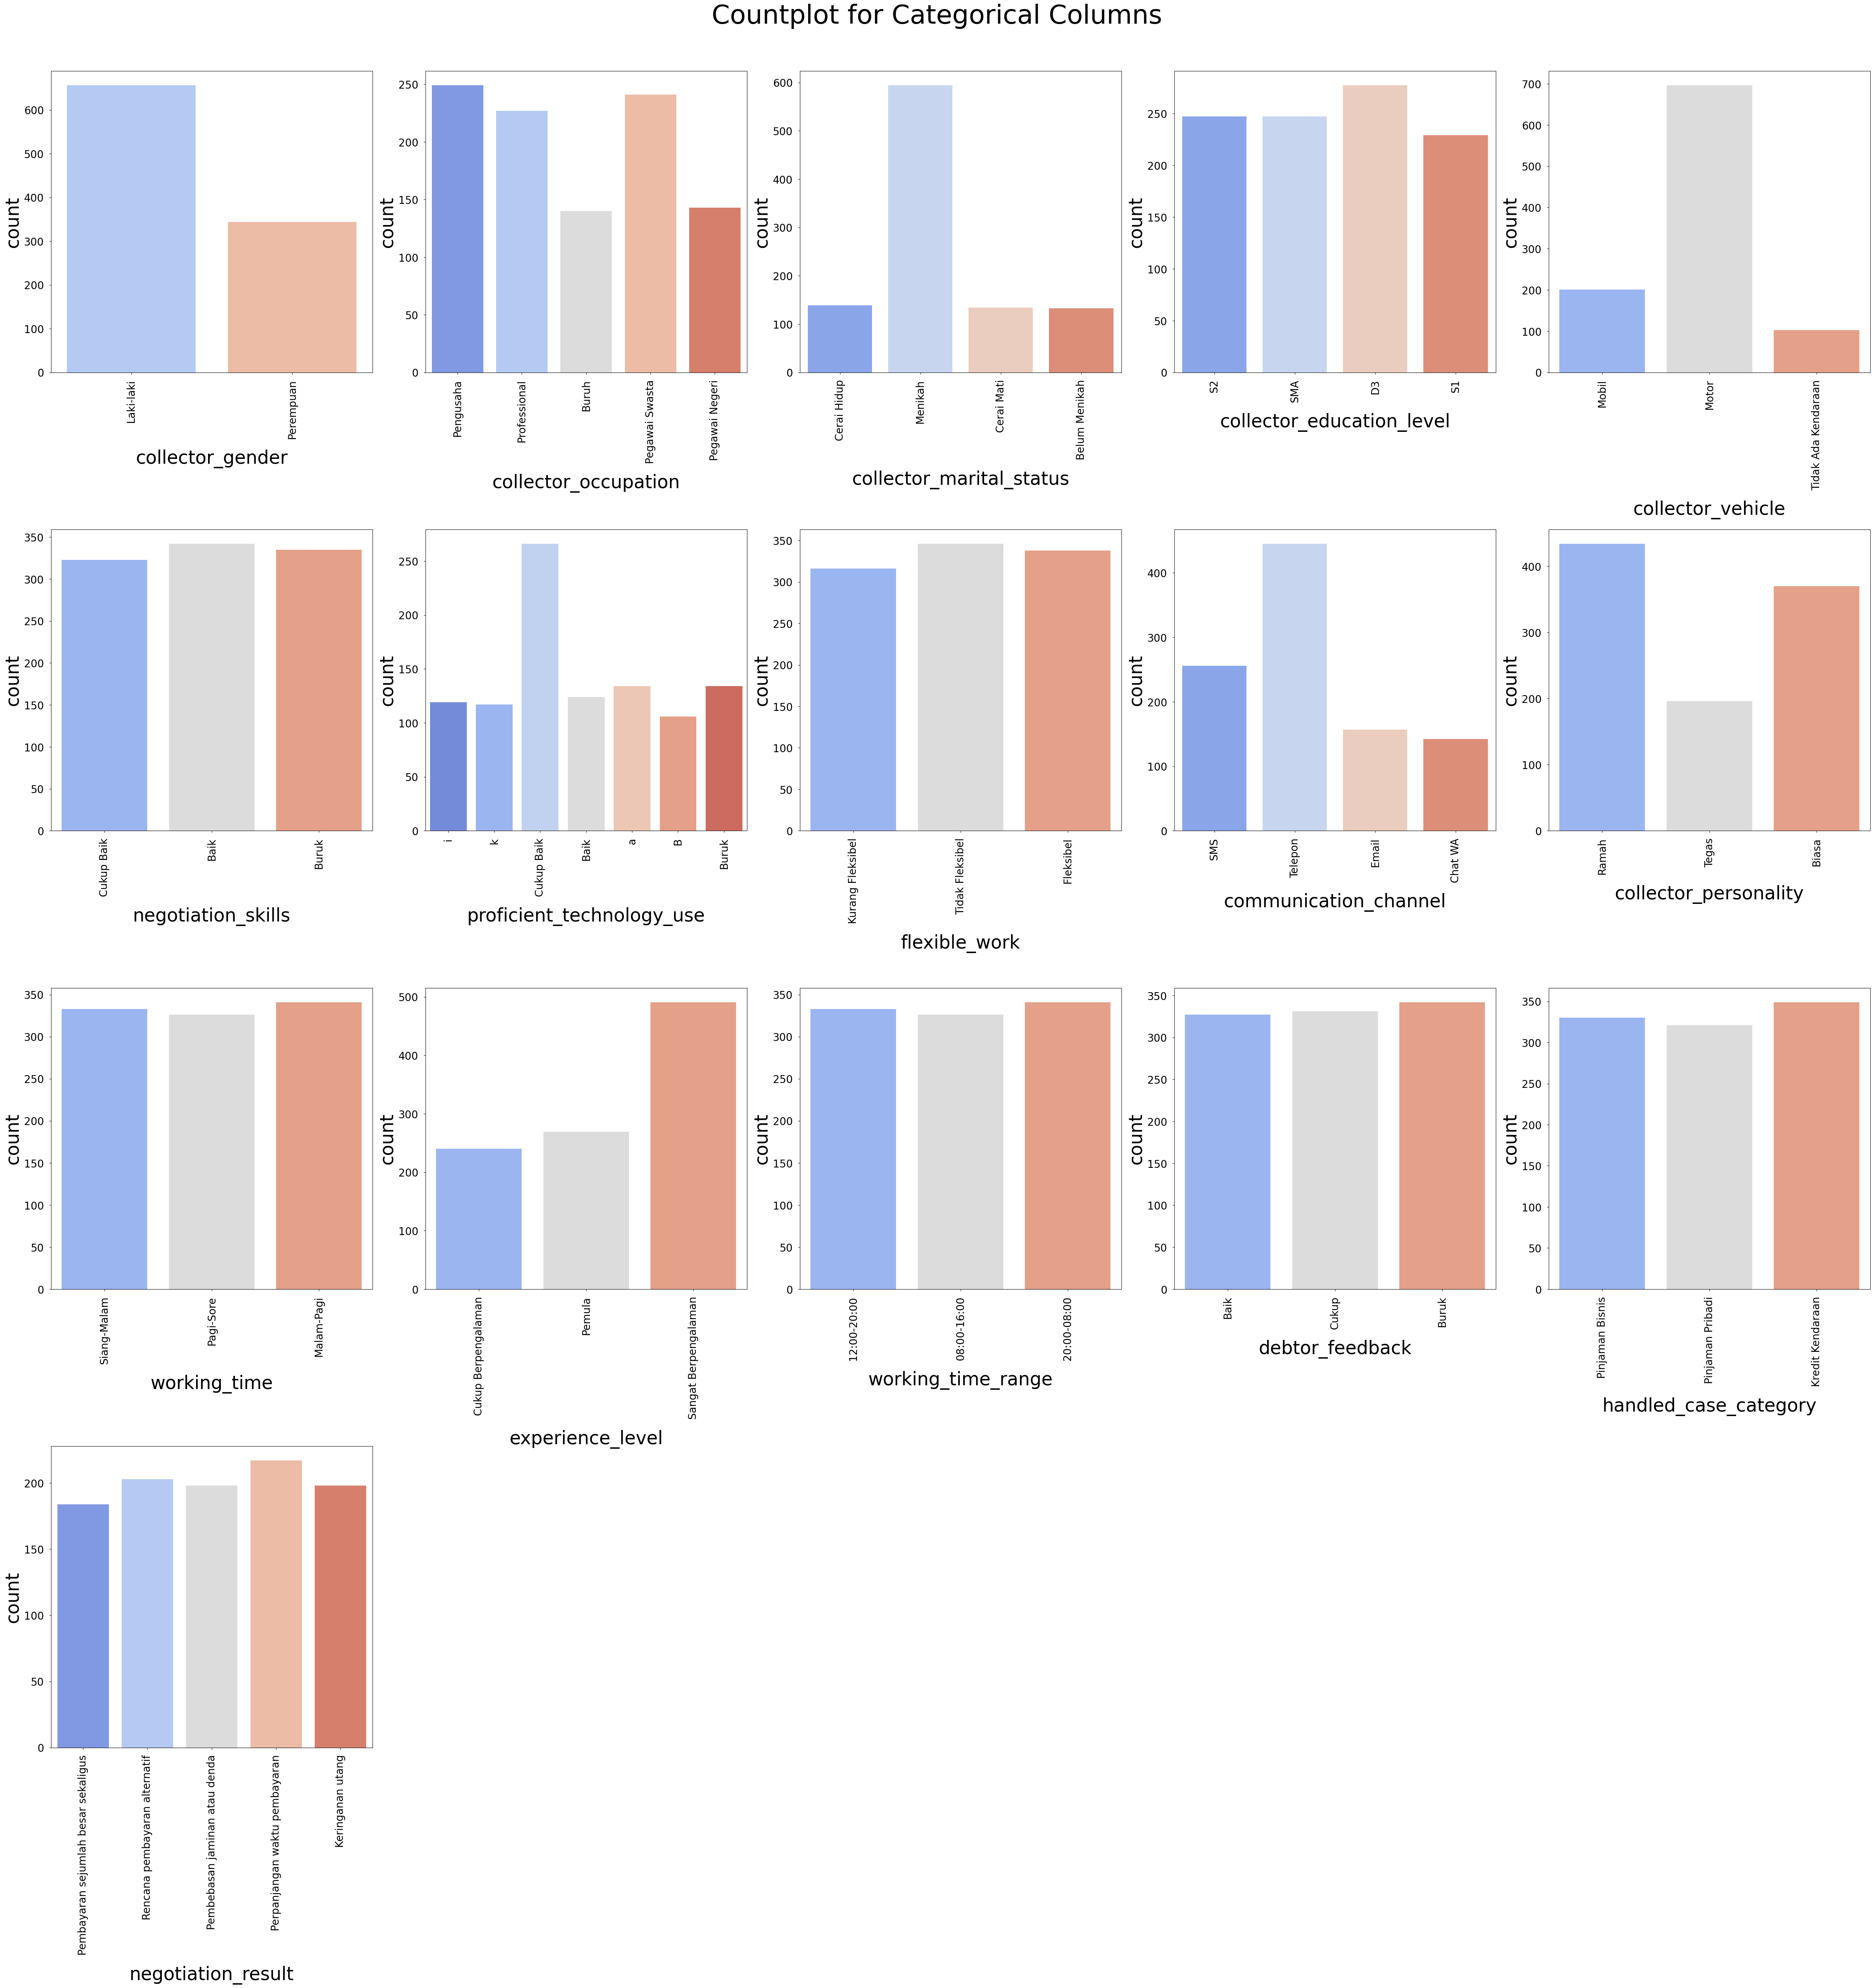

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 60))

for i in range(0, len(categorical_cols)):
    plt.subplot(5, 5, i + 1)
    ax = sns.countplot(x=df[categorical_cols[i]], palette='coolwarm', orient='h')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('count', fontsize=35)  # Mengatur label sumbu y
    ax.set_xlabel(categorical_cols[i], fontsize=35)  # Mengatur label sumbu x
    ax.xaxis.labelpad = 20

# Menambahkan judul keseluruhan
plt.suptitle('Countplot for Categorical Columns', fontsize=50)
plt.subplots_adjust(top=0.95)  # Menyesuaikan posisi judul keseluruhan
plt.show()


####Numerical

In [ ]:
numerical_cols = ['collector_age', 'collector_monthly_income', 'year_experience',
                  'collector_experience', 'success_rate', 'handled_case_count', 'responsive_rate']

In [ ]:
# Membuat subplot dengan 4 baris dan 3 kolom
plt.figure(figsize=(50, 60))

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i + 1)
    ax = sns.histplot(x=df[numerical_cols[i]], color='orchid')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('frequency', fontsize=35)  # Mengatur label sumbu y
    ax.set_xlabel(numerical_cols[i], fontsize=35)  # Mengatur label sumbu x
    ax.xaxis.labelpad = 20

# Menyusun subplot dan menampilkan plot
plt.tight_layout()
plt.show()

### Category Encoding

In [ ]:
scoring_col = df[['collector_gender', 'collector_occupation', 'collector_marital_status',
                  'collector_education_level', 'source_of_fuel_for_cooking', 'collector_vehicle',
                  'negotiation_skills', 'proficient_technology_use', 'flexible_work',
                  'communication_channel', 'collector_personality', 'working_time', 'collector_experience',
                  'debtor_feedback', 'handled_case_category', 'negotiation_result']]
scoring_col.head()

In [ ]:
collector_gender_dict = {
    "Laki-laki": 0,
    "Perempuan": 1,
}

collector_occupation_dict = {
    "Buruh": 0,
    "Pegawai Swasta": 1,
    "Pegawai Negeri": 2,
    "Professional": 3,
    "Pengusaha": 4,
}

collector_marital_status_dict = {
    "Belum Menikah": 2,
    "Menikah": 3,
    "Cerai Hidup": 1,
    "Cerai Mati": 0,
}

collector_education_level_dict = {
    "SMA": 0,
    "D3": 1,
    "S1": 2,
    "S2": 3,
}

source_of_fuel_for_cooking_dict = {
    "Kayu Bakar": 0,
    "Minyak Tanah": 1,
    "Gas Elpiji 3 kg": 2,
    "Gas Elpiji > 3 kg": 3,
    "Kompor Listrik": 4,
}

collector_vehicle_dict = {
    "Tidak Ada Kendaraan": 0,
    "Motor": 1,
    "Mobil": 2,
}

negotiation_skills_dict = {
    "Buruk": 0,
    "Cukup Baik": 1,
    "Baik": 2,
}

proficient_technology_use_dict = {
    "Buruk": 0,
    "Cukup Baik": 1,
    "Baik": 2,
}

flexible_work_dict = {
    "Tidak Fleksibel": 0,
    "Kurang Fleksibel": 1,
    "Fleksibel": 2,
}

communication_channel_dict = {
    "Telepon": 0,
    "SMS" : 1,
    "Email" : 2,
    "Chat WA" : 3,
}

collector_personality_dict = {
    "Kasar": 0,
    "Biasa" : 1,
    "Ramah" : 2,
}

working_time_dict = {
    "Malam-Pagi": 0,
    "Siang-Malam": 1,
    "Pagi-Sore": 2,
}

collector_experience_dict = {
    "Pemula": 0,
    "Cukup Berpengalaman": 1,
    "Sangat Berpengalaman": 2,
}

debtor_feedback_dict = {
    "Buruk": 0,
    "Cukup": 1,
    "Baik": 2
}

handled_case_category_dict = {
    "Pinjaman Pribadi": 0,
    "Kredit Kendaraan": 1,
    "Pinjaman Bisnis": 2,
}

negotiation_result_dict = {
    "Rencana pembayaran alternatif": 4,
    "Keringanan utang": 3,
    "Perpanjangan waktu pembayaran": 2,
    "Pembayaran sejumlah besar sekaligus": 1,
    "Pembebasan jaminan atau denda": 0,
}

In [ ]:
scoring_col['collector_gender'] = scoring_col['collector_gender'].replace(collector_gender_dict)
scoring_col['collector_occupation'] = scoring_col['collector_occupation'].replace(collector_occupation_dict)
scoring_col['collector_marital_status'] = scoring_col['collector_marital_status'].replace(collector_marital_status_dict)
scoring_col['collector_education_level'] = scoring_col['collector_education_level'].replace(collector_education_level_dict)
scoring_col['source_of_fuel_for_cooking'] = scoring_col['source_of_fuel_for_cooking'].replace(source_of_fuel_for_cooking_dict)
scoring_col['collector_vehicle'] = scoring_col['collector_vehicle'].replace(collector_vehicle_dict)
scoring_col['negotiation_skills'] = scoring_col['negotiation_skills'].replace(negotiation_skills_dict)
scoring_col['proficient_technology_use'] = scoring_col['proficient_technology_use'].replace(proficient_technology_use_dict)
scoring_col['flexible_work'] = scoring_col['flexible_work'].replace(flexible_work_dict)
scoring_col['communication_channel'] = scoring_col['communication_channel'].replace(communication_channel_dict)
scoring_col['collector_personality'] = scoring_col['collector_personality'].replace(collector_personality_dict)
scoring_col['working_time'] = scoring_col['working_time'].replace(working_time_dict)
scoring_col['debtor_feedback'] = scoring_col['debtor_feedback'].replace(debtor_feedback_dict)
scoring_col['handled_case_category'] = scoring_col['handled_case_category'].replace(handled_case_category_dict)
scoring_col['negotiation_result'] = scoring_col['negotiation_result'].replace(negotiation_result_dict)
scoring_col['collector_experience'] = scoring_col['collector_experience'].replace(collector_experience_dict)

In [ ]:
scoring_col.head()

### Data Scalling

In [ ]:
# Lakukan scaling pada kolom-kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)
scaled_numerical_df.head()

In [ ]:
# Lakukan scaling pada kolom-kolom kategori yang telah di-encoding
scaled_category_data = scaler.fit_transform(scoring_col)
scaled_category_df = pd.DataFrame(scaled_category_data, columns=scoring_col.columns)
scaled_category_df.head()

In [ ]:
# Gabungkan kedua DataFrame (numerik dan kategori)
scaled_combined_df = pd.concat([scaled_numerical_df, scaled_category_df], axis=1)

###Correlation Matrix

In [ ]:
corr_matrix = scaled_combined_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###Data Description

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

Berdasarkan Demografis

In [ ]:
# from faker import Faker
# import random

# fake = Faker('id_ID')

# def generate_collector_gender():
#     return fake.random_element(elements=('Laki-laki', 'Perempuan'))

# def generate_collector_age(collector_gender):
#     if collector_gender == 'Laki-laki':
#         return int(random.normalvariate(30, 5))
#     else:
#         return int(random.normalvariate(28, 5))

# def generate_collector_location():
#     return fake.city_name()

# def generate_collector_education_level(collector_age):
#     if collector_age < 25:
#         return fake.random_element(elements=('SMA', 'Diploma'))
#     else:
#         return fake.random_element(elements=('Diploma', 'Sarjana', 'Pascasarjana'))

# def generate_collector_marital_status(collector_age):
#     if collector_age < 28:
#         return 'Belum Menikah'
#     else:
#         return fake.random_element(elements=('Menikah', 'Cerai Hidup'))

# def generate_collector_communication_method():
#     return fake.random_element(elements=('Telepon', 'Email', 'SMS', 'Chat WA'))

# def generate_collector_communication_style(collector_age):
#     if collector_age < 25:
#         return 'Tegas'
#     else:
#         return fake.random_element(elements=('Ramah', 'Tegas', 'Formal'))

# def generate_collector_assignment(collector_age, collector_education_level, collector_marital_status):
#     if collector_age < 25 and collector_education_level == 'SMA':
#         return 'Pelanggan Muda'
#     elif collector_age > 30 and collector_marital_status == 'Menikah':
#         return 'Pelanggan Dewasa Menikah'
#     else:
#         return 'Umum'

# def generate_collector_label(collector_assignment):
#     if collector_assignment == 'Pelanggan Muda':
#         return 'Muda'
#     elif collector_assignment == 'Pelanggan Dewasa Menikah':
#         return 'Dewasa Menikah'
#     else:
#         return 'Umum'

# data = []
# for _ in range(1000):
#     collector_gender = generate_collector_gender()
#     collector_age = generate_collector_age(collector_gender)
#     collector_location = generate_collector_location()
#     collector_education_level = generate_collector_education_level(collector_age)
#     collector_marital_status = generate_collector_marital_status(collector_age)
#     collector_communication_method = generate_collector_communication_method()
#     collector_communication_style = generate_collector_communication_style(collector_age)
#     collector_assignment = generate_collector_assignment(collector_age, collector_education_level, collector_marital_status)
#     collector_label = generate_collector_label(collector_assignment)

#     data.append([collector_gender, collector_age, collector_location, collector_education_level,
#                  collector_marital_status, collector_communication_method, collector_communication_style,
#                  collector_assignment, collector_label])

# # Membuat DataFrame dari data
# import pandas as pd
# df = pd.DataFrame(data, columns=['collector_gender', 'collector_age', 'collector_location',
#                                  'collector_education_level', 'collector_marital_status',
#                                  'collector_communication_method', 'collector_communication_style',
#                                  'collector_assignment', 'collector_label'])

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv('dummy_data_collector.csv', index=False)


In [ ]:

# # Inisialisasi library Faker dengan bahasa Indonesia
# fake = Faker('id_ID')

# # Fungsi untuk menghasilkan data umur dengan distribusi normal
# def generate_age():
#     age = int(random.normalvariate(35, 10))  # Mean = 35, Std Deviation = 10
#     return max(18, age)

# # Fungsi untuk menghasilkan data pendapatan dengan distribusi normal
# def generate_income(education_level):
#     if education_level == 'SD':
#         return round(random.normalvariate(2000000, 800000))  # Mean = 2,000,000, Std Deviation = 800,000
#     elif education_level == 'SMP':
#         return round(random.normalvariate(2500000, 1000000))  # Mean = 2,500,000, Std Deviation = 1,000,000
#     elif education_level == 'SMA':
#         return round(random.normalvariate(3000000, 1200000))  # Mean = 3,000,000, Std Deviation = 1,200,000
#     elif education_level == 'Sarjana':
#         return round(random.normalvariate(8000000, 2000000))  # Mean = 8,000,000, Std Deviation = 2,000,000
#     else:
#         return round(random.normalvariate(12000000, 3000000))  # Mean = 12,000,000, Std Deviation = 3,000,000

# # Fungsi untuk menghasilkan data pengeluaran berdasarkan pendapatan dan distribusi normal
# def generate_expense(income):
#     return round(random.normalvariate(income * 0.6, 1000000))  # Mean = 60% of income, Std Deviation = 1,000,000

# # Fungsi untuk menghasilkan data jumlah tanggungan berdasarkan umur dan distribusi normal
# def generate_dependents(age):
#     return max(0, int(random.normalvariate(2 + age//30, 1)))  # Mean = 2 + (age / 30), Std Deviation = 1

# # Fungsi untuk menghasilkan jenis kredit berdasarkan loan_amount
# def generate_loan_type(loan_amount):
#     if loan_amount < 200000000:
#         return 'Pinjaman Pribadi'
#     elif loan_amount < 50000000:
#         return 'Kartu Kredit'
#     else:
#         return 'Pinjaman Bisnis'

# # Fungsi untuk menghasilkan occupation berdasarkan education_level
# def generate_occupation(education_level):
#     if education_level in ['SD', 'SMP']:
#         return 'Buruh'
#     elif education_level in ['SMA', 'Diploma']:
#         return fake.random_element(elements=('Pegawai Negeri', 'Pegawai Swasta'))
#     elif education_level in ['Sarjana', 'Diploma']:
#         return fake.random_element(elements=('Pegawai Swasta', 'Profesional'))
#     else:
#         return fake.random_element(elements=('Profesional', 'Pengusaha'))

# # Fungsi untuk menghasilkan data loan_amount berdasarkan atribut lain
# def generate_loan_amount(income, dependents, expense, asset_ownership):
#     base_amount = income * 2 + dependents * 500000 - expense
#     if asset_ownership == 'Yes':
#         base_amount += 1000000
#     return max(1000000, round(base_amount))

# # Fungsi untuk menghasilkan data lokasi pelanggan
# def generate_customer_location():
#     return fake.city_name()

# # Fungsi untuk menghasilkan data customer time preferences
# def generate_working_time():
#     return fake.random_element(elements=('Pagi-Sore', 'Siang-Malam', 'Malam-Pagi'))

# # Generate dummy data
# data = []
# for _ in range(1000):
#     age = generate_age()
#     education_level = fake.random_element(elements=('SD','SMP', 'SMA', 'Diploma', 'Sarjana', 'Pascasarjana'))
#     income = generate_income(education_level)
#     expense = generate_expense(income)
#     dependents = generate_dependents(age)

#     billing_datetime = fake.date_time_this_year()
#     payment_datetime = billing_datetime + timedelta(days=random.randint(1, 30))
#     payment_delay = payment_datetime - billing_datetime

#     customer_gender = fake.random_element(elements=('Laki-laki', 'Perempuan'))
#     customer_marital_status = fake.random_element(elements=('Belum Menikah', 'Menikah', 'Cerai Mati', 'Cerai Hidup'))
#     occupation = generate_occupation(education_level)
#     asset_ownership = fake.random_element(elements=('Ya', 'Tidak'))
#     communication_channel = fake.random_element(elements=('Telepon', 'Email', 'SMS', 'Chat WA'))
#     payment_history = fake.random_element(elements=('Tepat Waktu', 'Tertunda', 'Bermasalah'))
#     risk_credit_history = fake.random_element(elements=('Baik', 'Cukup Baik', 'Buruk'))
#     financial_situations = fake.random_element(elements=('AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'N/A'))

#     loan_amount = generate_loan_amount(income, dependents, expense, asset_ownership)
#     loan_type = generate_loan_type(loan_amount)
#     customer_coordinates = generate_customer_location()
#     working_time = generate_working_time()

#     data.append([age, customer_gender, customer_marital_status,
#                  dependents, education_level, income, expense, occupation, asset_ownership, communication_preference,
#                  billing_datetime, payment_datetime, payment_delay, payment_history,
#                  risk_credit_history, loan_amount, loan_type, customer_coordinates, time_preference])

# # Membuat DataFrame dari data
# df = pd.DataFrame(data, columns=['customer_age', 'customer_gender',
#                                  'customer_marital_status', 'customer_number_of_dependents', 'customer_education_level', 'customer_monthly_income',
#                                  'customer_expense', 'customer_occupation', 'customer_asset_ownership', 'communication_preference',
#                                  'billing_datetime', 'payment_datetime', 'payment_delay',
#                                  'payment_history', 'risk_credit_history', 'loan_amount', 'loan_type', 'customer_coordinates', 'customer_time_preferences'])

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv('dummy_data_customer.csv', index=False)
